# Surface Normal Smoothing -- Kernel Expansion


In [1]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

cm = 1/2.54  # centimeters in inches

%matplotlib inline

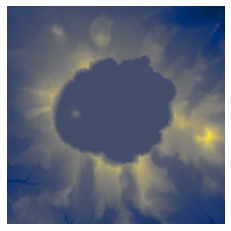

In [6]:
#H = np.asarray(Image.open(r"./ConeDEM.tif"))
H = np.asarray(Image.open(r"./Crater_Lake.tif"))
cellsize = 3.33

plt.axis('off')
plt.imshow(H, cmap='cividis')

In [7]:
from trf import surface
snv_1 = surface.normals(H, cellsize, method="N82", level=1)
snv_3 = surface.normals(H, cellsize, method="N82", level=32)



In [8]:
from trf import shader, utils

lv = utils.lightVector(315, 45)
hs = shader.lambert(snv_1, lv)
hs_3 = shader.lambert(snv_3, lv)


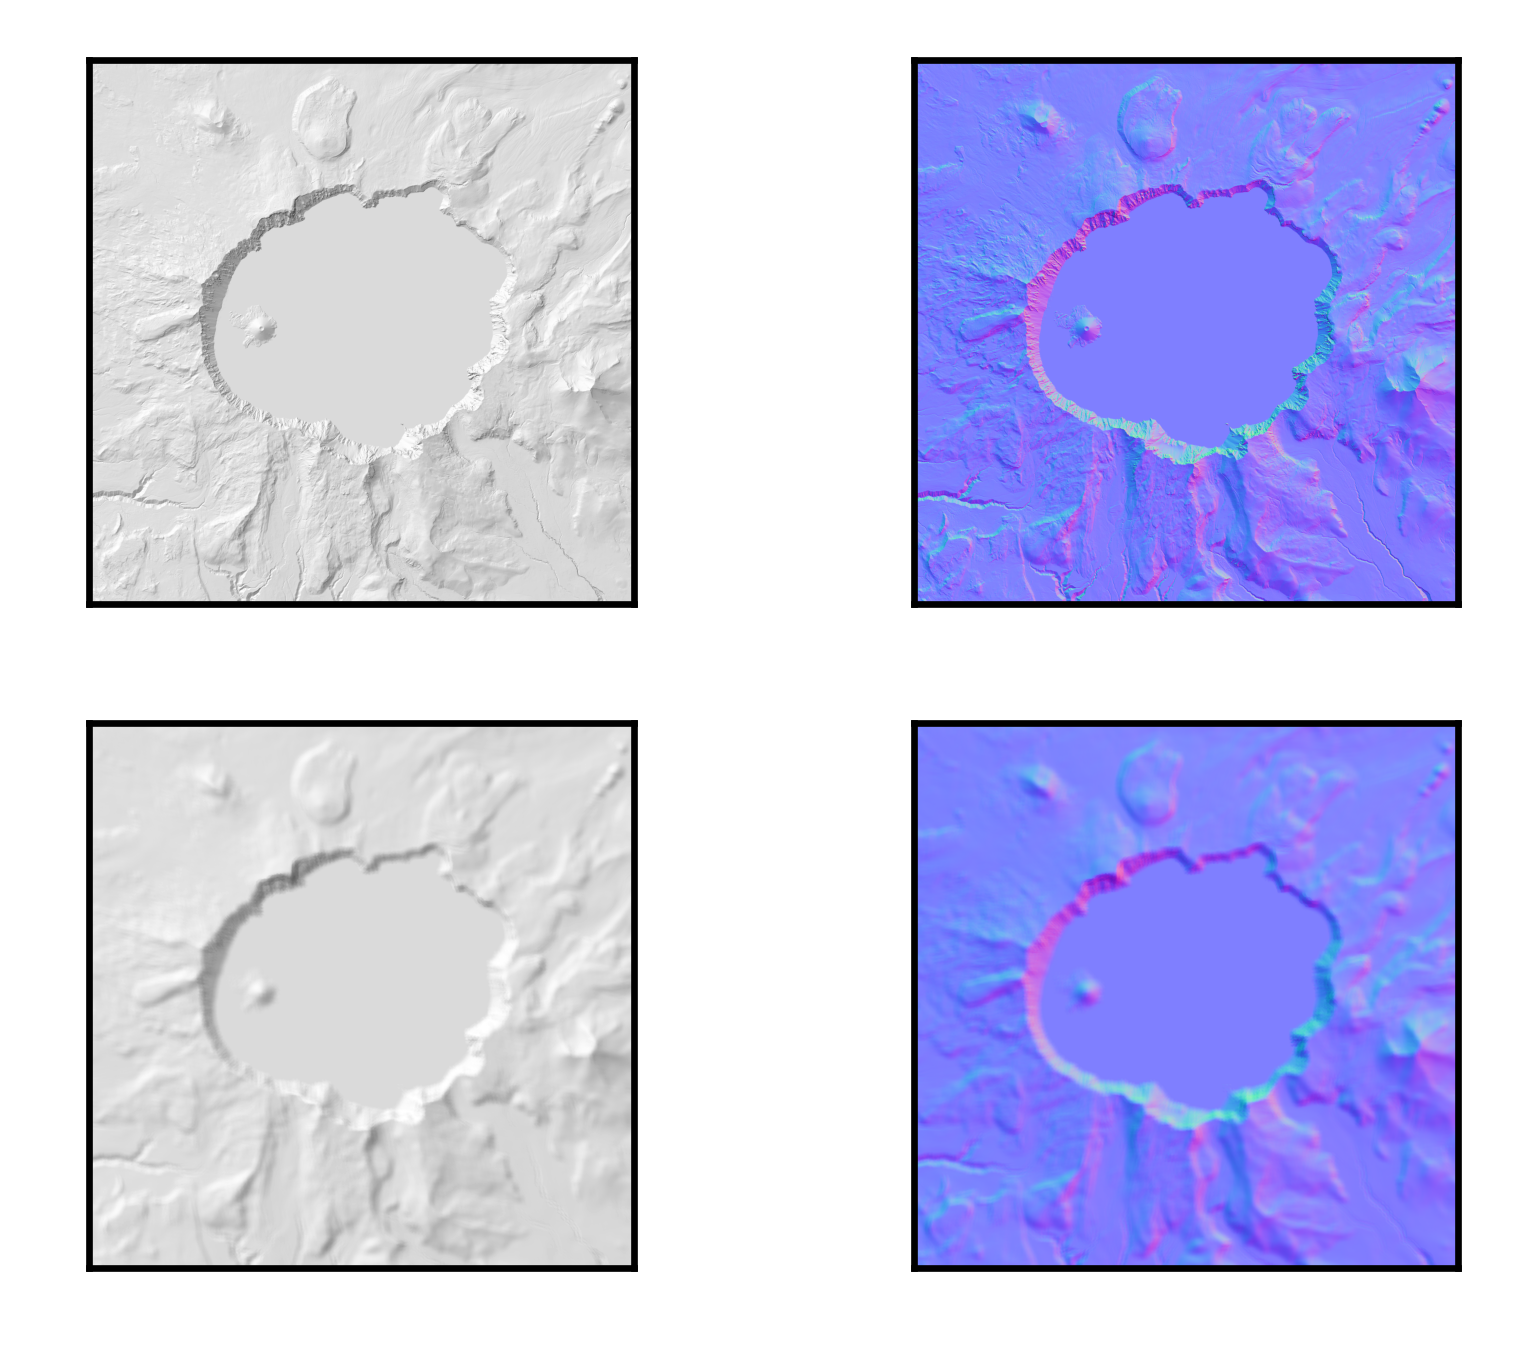

In [9]:
fig, axs = plt.subplots(2,2, figsize=(8*cm, 6*cm))
fig.set_dpi(600)

axs[0][0].yaxis.set_visible(False)
axs[0][0].xaxis.set_visible(False)
axs[0][0].imshow((hs + 1) / 2, cmap='gray', vmin=0, vmax=1)

axs[0][1].yaxis.set_visible(False)
axs[0][1].xaxis.set_visible(False)
snv_1_x = np.moveaxis((snv_1 + 1)/ 2, 0, 2)
axs[0][1].imshow(snv_1_x)

axs[1][0].yaxis.set_visible(False)
axs[1][0].xaxis.set_visible(False)
axs[1][0].imshow((hs_3 + 1) / 2, cmap='gray', vmin=0, vmax=1)
axs[1][1].yaxis.set_visible(False)
axs[1][1].xaxis.set_visible(False)
snv_3_x = np.moveaxis((snv_3 + 1)/ 2, 0, 2)
axs[1][1].imshow(snv_3_x)
plt.tight_layout()